In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, RepeatVector
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
import cv2
import matplotlib.pyplot as pt

In [3]:
def load_data(image_folder, caption_file):
    image_paths, captions = [], []
    imgs = []
    with open(caption_file, 'r') as f:
        for line in f:
            line = line.strip().split(',')  # Assuming tab-separated file, adjust if comma
            image_name, caption = line[0], line[1]
            image_paths.append(os.path.join(image_folder, image_name))
            captions.append(caption)
            img = cv2.imread(os.path.join(image_folder, image_name))
            imgs.append(img)
    return imgs, image_paths, captions

In [4]:
image_folder = 'images-dl'  # Folder containing images
caption_file = "captions-dl.txt" # Text file with image-caption pairs
imgs, image_paths, captions = load_data(image_folder, caption_file)

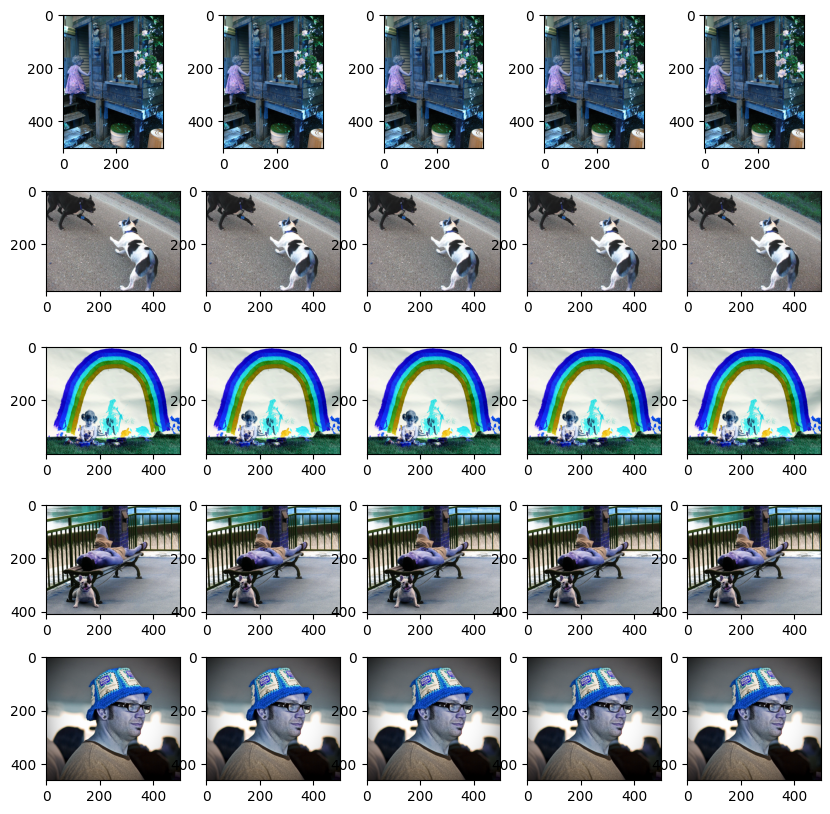

In [5]:
fig = pt.figure(figsize=(10,10))

for i in range(25):
    pt.subplot(5,5,i+1)
    pt.imshow(imgs[i])

In [6]:
image_paths = image_paths[1:12]

In [7]:
captions = captions[1:12]

In [8]:
cnn_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
cnn_model = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[-1].output)

In [9]:
import matplotlib.pyplot as plt

def extract_features(image):
    image = np.expand_dims(image, axis=0)  # Expand dims to simulate batch
    return cnn_model.predict(image)

In [10]:
def build_captioning_model(vocab_size, max_caption_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=256, input_length=max_caption_length))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dense(vocab_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

In [11]:
vocab_size = 1000           # Dummy vocab size for captions
max_caption_length = 10      # Max length of captions

# Build and summarize the model
captioning_model = build_captioning_model(vocab_size, max_caption_length)
captioning_model.summary()

# Dummy data for demonstration
image = np.random.rand(224, 224, 3)  # Dummy image data
caption = np.random.randint(1, vocab_size, (1, max_caption_length))

C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
image_features = extract_features(image)
print("Extracted Image Features:", image_features.shape)

C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
Extracted Image Features: (1, 7, 7, 512)


In [13]:
captioning_model.fit(caption, np.random.rand(1, max_caption_length, vocab_size), epochs=10,verbose=1)

Epoch 1/10


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3457.4114
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 3457.3464
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3457.2883
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3457.2351
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3457.1868
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3457.1440
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3457.1199
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3457.1582
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3457.3789
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3458.0962


In [14]:
reference_captions = [
    ["a", "sample", "caption", "of", "an", "image"],
    ["another", "description", "of", "the", "image", "content"]
]

In [15]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\sselc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
from nltk.translate.bleu_score import sentence_bleu

def evaluate_bleu(reference, candidate):
    reference = [reference]  # NLTK BLEU expects list of references
    return sentence_bleu(reference, candidate)

In [17]:
dummy_generated_caption = ["this", "is", "a", "generated", "caption"]
bleu_score = evaluate_bleu(reference_captions[0], dummy_generated_caption)
print("BLEU score for the generated caption:", bleu_score)

BLEU score for the generated caption: 1.1862177682648818e-231


C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-pa